# QF633 Project (Leon Cai)

## Read and study Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.interpolate import CubicSpline

In [ ]:
df = pd.read_csv("20220515_BTC_Ticker.csv")
df2 = pd.read_csv("20220515_ETH_Ticker.csv")

In [ ]:
# df.tail()

In [ ]:
df['extracted'] = df['contractName'].str.extract(r'-(\d+[A-Z]{3}\d{2})-', expand=False)

In [ ]:
df.extracted.unique()

In [ ]:
df['now'] = df['time'].str.split('T').str[0]

In [ ]:
df.now.unique()

In [ ]:
max(df.markIV)

In [ ]:
max(df2.markIV)

## Sorting data by time then write back to csv

In [ ]:
df = df.sort_values(by='time', ascending=True)
df.to_csv("20220515_BTC_Ticker.csv", index=False)

df2 = df2.sort_values(by='time', ascending=True)
df2.to_csv("20220515_ETH_Ticker.csv", index=False)

In [ ]:
test1 = df.head(100000)
test2 = df2.head(100000)

In [ ]:
#Test data for dev purposes
test1.to_csv("dev_btc.csv", index=False)
test2.to_csv("dev_eth.csv", index=False)

In [ ]:
dev_btc = pd.read_csv("dev_btc.csv")
dev_eth = pd.read_csv("dev_eth.csv")

In [ ]:
dev_btc.tail(1)

In [ ]:
# dev_btc[dev_btc.msgType == "snap"]

In [ ]:
# dev_eth[dev_eth.msgType == "snap"]

## Test Cases

In [ ]:
test_step2_df = pd.read_csv("test_step2.csv")

In [ ]:
test_step2_df

In [ ]:
test_step3_df = pd.read_csv("test_step3.csv")

In [ ]:
test_step3_df['Expiry Date'] = test_step3_df['contractName'].str.extract(r'-(\d+[A-Z]{3}\d{2})-', expand=False)

In [ ]:
test_step3_df[['contractName','Expiry Date']].head()

In [ ]:
len(test_step3_df[test_step3_df["Expiry Date"] == '31MAR23'])

In [ ]:
test_step3_df["Expiry Date"].nunique() #10 groups of expiry dates

## Reading Output Files

In [3]:
btc_op = pd.read_csv("BTC_output.csv")
eth_op = pd.read_csv("ETH_output.csv")

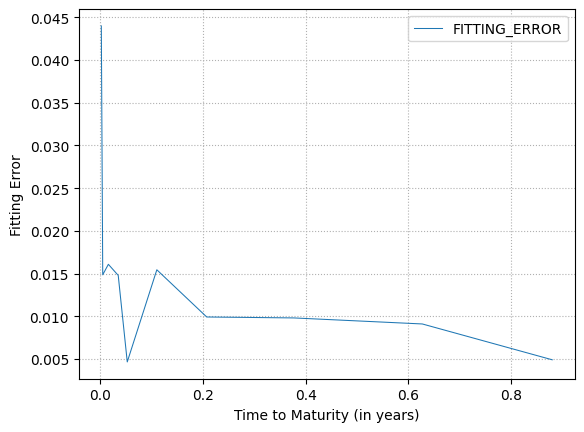

In [5]:
btc_op.plot("MATURTIES", "FITTING_ERROR", lw=0.75)
plt.xlabel('Time to Maturity (in years)')
plt.ylabel('Fitting Error')
plt.grid(linestyle='dotted')
plt.show()

In [4]:
smile_df = btc_op[btc_op.EXPIRY == '31-MAR-2023']

In [7]:
smile_df

,TIME,EXPIRY,MATURTIES,FUT_PRICE,ATM,BF25,RR25,BF10,RR10,FITTING_ERROR,K_QD90,K_QD75,K_QD25,K_QD10
9,2022-05-15-T00:28:00.227Z,31-MAR-2023,0.879855,30935.3,0.7063,0.024872,-0.087998,0.080807,-0.180502,0.004917,13234.8,19787.3,48364.0,72308.6


In [44]:
x = [smile_df.K_QD90, smile_df.K_QD75, smile_df.FUT_PRICE, smile_df.K_QD25, smile_df.K_QD10]

sigma90 = smile_df.ATM + smile_df.BF10 - (smile_df.RR10/2)
sigma75 = smile_df.ATM + smile_df.BF25 - (smile_df.RR25/2)
sigma25 = smile_df.ATM + smile_df.BF25 + (smile_df.RR25/2)
sigma10 = smile_df.ATM + smile_df.BF10 + (smile_df.RR10/2)

y = [sigma90, sigma75, smile_df.ATM, sigma25, sigma10]

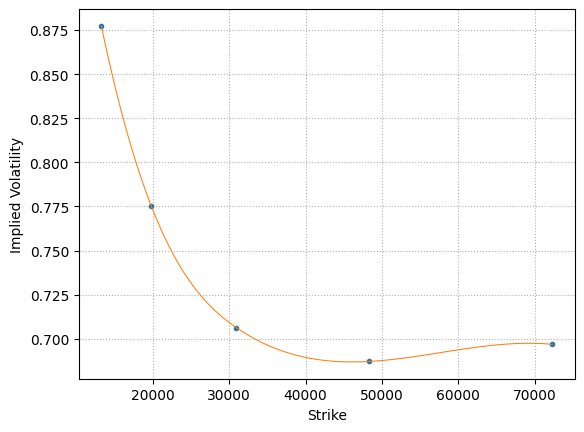

In [49]:
x = np.array(x).reshape(-1)
y = np.array(y)

x_interpolated = np.linspace(13234.8, 72308.6, 100)
# Perform cubic spline interpolation
cs = CubicSpline(x, y)
y_interpolated = cs(x_interpolated)

# Plot original data points and interpolated points
plt.plot(x, y, '.', label='Original Data')
plt.plot(x_interpolated, y_interpolated, '-', lw=0.75, label='Interpolated Data')
plt.xlabel('Strike')
plt.ylabel('Implied Volatility')
plt.grid(linestyle='dotted')